In [1]:
import torchvision

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/changebio/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 167502836/167502836 [01:12<00:00, 2316092.59it/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [16]:
def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class,pred

In [6]:
from PIL import Image

In [8]:
import torchvision.transforms as T

In [17]:
get_prediction("/home/changebio/Downloads/coco_sample/train_sample/000000000030.jpg",0.5)

([[(235.67989, 152.11107), (405.3575, 351.01703)],
  [(193.70541, 30.247698), (468.5837, 346.64938)]],
 ['vase', 'potted plant'],
 [{'boxes': tensor([[235.6799, 152.1111, 405.3575, 351.0170],
           [193.7054,  30.2477, 468.5837, 346.6494],
           [  0.0000, 316.3571, 639.9999, 423.8187],
           [207.9842,  64.9982, 456.8460, 346.8069],
           [ 23.9613, 306.7718, 634.3465, 368.4931],
           [239.6344, 141.5530, 545.0409, 343.0680],
           [198.6555,  38.9763, 461.2603, 325.8283]], grad_fn=<StackBackward>),
   'labels': tensor([86, 64, 67, 86, 67, 86, 61]),
   'scores': tensor([0.9939, 0.8910, 0.1704, 0.1141, 0.0608, 0.0507, 0.0502],
          grad_fn=<IndexBackward>)}])

In [11]:
import cv2

In [13]:
import matplotlib.pyplot as plt

In [15]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

In [10]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
 
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure(figsize=(20,30)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

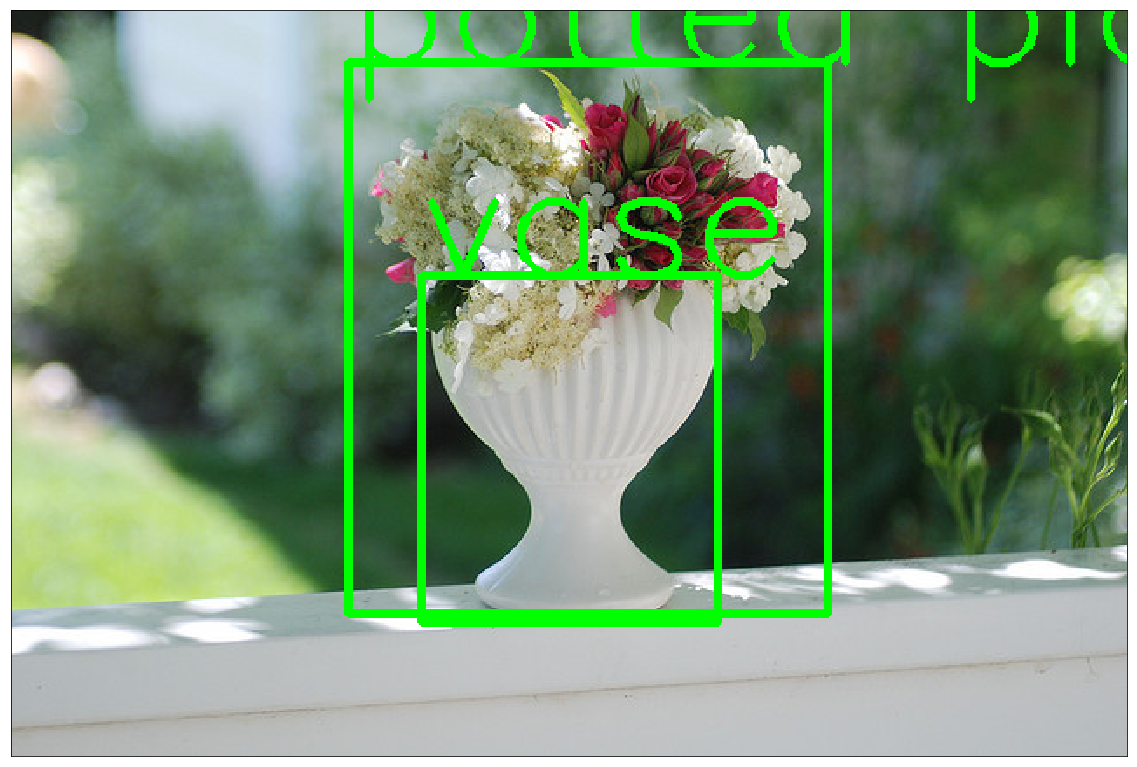

In [14]:
object_detection_api("/home/changebio/Downloads/coco_sample/train_sample/000000000030.jpg")

In [1]:
from processor import Processor

In [2]:
a = Processor()

In [7]:
a.word_dict['cuff']

13910

In [8]:
s = "u.s national park services tonto national forest stop the annihilation of the salt river wild horse... via @change"

In [11]:
label_list = [2.0, 0.2, 10.0, 50.0, 0.5, 100.0, 0.1, 5.0, 1.0]

In [14]:
label_list.index(1.0)

8

In [15]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

In [16]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenized input
text = "[CLS] Who was Jim Henson ? [SEP] Jim Henson was a puppeteer [SEP]"
tokenized_text = tokenizer.tokenize(text)

In [18]:
# Mask a token that we will try to predict back with `BertForMaskedLM`
masked_index = 8
tokenized_text[masked_index] = '[MASK]'
assert tokenized_text == ['[CLS]', 'who', 'was', 'jim', 'henson', '?', '[SEP]', 'jim', '[MASK]', 'was', 'a', 'puppet', '##eer', '[SEP]']

In [19]:
# Convert token to vocabulary indices
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
# Define sentence A and B indices associated to 1st and 2nd sentences (see paper)
segments_ids = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [21]:
tokens_tensor

tensor([[  101,  2040,  2001,  3958, 27227,  1029,   102,  3958,   103,  2001,
          1037, 13997, 11510,   102]])

In [22]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
segments_tensors = segments_tensors.to('cuda')
model.to('cuda')

# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)
# We have a hidden states for each of the 12 layers in model bert-base-uncased
assert len(encoded_layers) == 12

In [25]:
[i.shape for i in encoded_layers]

[torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768]),
 torch.Size([1, 14, 768])]

In [26]:
# Load pre-trained model (weights)
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
segments_tensors = segments_tensors.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    predictions = model(tokens_tensor, segments_tensors)

# confirm we were able to predict 'henson'
predicted_index = torch.argmax(predictions[0, masked_index]).item()
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]
assert predicted_token == 'henson'

In [33]:
for i in range(14):
    predicted_index = torch.argmax(predictions[0, i]).item()
    print(tokenizer.convert_ids_to_tokens([predicted_index]))

['.']
['who']
['was']
['jim']
['henson']
['?']
['.']
['jim']
['henson']
['was']
['a']
['puppet']
['##eer']
['.']


In [30]:
predictions[0,8].shape

torch.Size([30522])

In [ ]:
import argparse
#import logging
import os
import sys
import random
from tqdm import tqdm, trange

import numpy as np

import torch
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)
from torch.utils.data.distributed import DistributedSampler
from torch.nn import CrossEntropyLoss, MSELoss

from tensorboardX import SummaryWriter

from pytorch_pretrained_bert.file_utils import WEIGHTS_NAME, CONFIG_NAME
from pytorch_pretrained_bert.modeling import BertForSequenceClassification
from pytorch_pretrained_bert.tokenization import BertTokenizer
from pytorch_pretrained_bert.optimization import BertAdam, WarmupLinearSchedule

from run_classifier_dataset_utils import processors, output_modes, convert_examples_to_features, compute_metrics




def main():
    parser = argparse.ArgumentParser()

    ## Required parameters
    parser.add_argument("--data_dir",
                        default=None,
                        type=str,
                        required=True,
                        help="The input data dir. Should contain the .tsv files (or other data files) for the task.")
    parser.add_argument("--bert_model", default=None, type=str, required=True,
                        help="Bert pre-trained model selected in the list: bert-base-uncased, "
                        "bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased, "
                        "bert-base-multilingual-cased, bert-base-chinese.")
    parser.add_argument("--task_name",
                        default=None,
                        type=str,
                        required=True,
                        help="The name of the task to train.")
    parser.add_argument("--output_dir",
                        default=None,
                        type=str,
                        required=True,
                        help="The output directory where the model predictions and checkpoints will be written.")

    ## Other parameters
    parser.add_argument("--cache_dir",
                        default="",
                        type=str,
                        help="Where do you want to store the pre-trained models downloaded from s3")
    parser.add_argument("--max_seq_length",
                        default=128,
                        type=int,
                        help="The maximum total input sequence length after WordPiece tokenization. \n"
                             "Sequences longer than this will be truncated, and sequences shorter \n"
                             "than this will be padded.")
    parser.add_argument("--do_train",
                        action='store_true',
                        help="Whether to run training.")
    parser.add_argument("--do_eval",
                        action='store_true',
                        help="Whether to run eval on the dev set.")
    parser.add_argument("--do_lower_case",
                        action='store_true',
                        help="Set this flag if you are using an uncased model.")
    parser.add_argument("--train_batch_size",
                        default=32,
                        type=int,
                        help="Total batch size for training.")
    parser.add_argument("--eval_batch_size",
                        default=8,
                        type=int,
                        help="Total batch size for eval.")
    parser.add_argument("--learning_rate",
                        default=5e-5,
                        type=float,
                        help="The initial learning rate for Adam.")
    parser.add_argument("--num_train_epochs",
                        default=3.0,
                        type=float,
                        help="Total number of training epochs to perform.")
    parser.add_argument("--warmup_proportion",
                        default=0.1,
                        type=float,
                        help="Proportion of training to perform linear learning rate warmup for. "
                             "E.g., 0.1 = 10%% of training.")
    parser.add_argument("--no_cuda",
                        action='store_true',
                        help="Whether not to use CUDA when available")
    parser.add_argument('--overwrite_output_dir',
                        action='store_true',
                        help="Overwrite the content of the output directory")
    parser.add_argument("--local_rank",
                        type=int,
                        default=-1,
                        help="local_rank for distributed training on gpus")
    parser.add_argument('--seed',
                        type=int,
                        default=42,
                        help="random seed for initialization")
    parser.add_argument('--gradient_accumulation_steps',
                        type=int,
                        default=1,
                        help="Number of updates steps to accumulate before performing a backward/update pass.")
    parser.add_argument('--fp16',
                        action='store_true',
                        help="Whether to use 16-bit float precision instead of 32-bit")
    parser.add_argument('--loss_scale',
                        type=float, default=0,
                        help="Loss scaling to improve fp16 numeric stability. Only used when fp16 set to True.\n"
                             "0 (default value): dynamic loss scaling.\n"
                             "Positive power of 2: static loss scaling value.\n")
    parser.add_argument('--server_ip', type=str, default='', help="Can be used for distant debugging.")
    parser.add_argument('--server_port', type=str, default='', help="Can be used for distant debugging.")
    args = parser.parse_args()

    if args.server_ip and args.server_port:
        # Distant debugging - see https://code.visualstudio.com/docs/python/debugging#_attach-to-a-local-script
        import ptvsd
        print("Waiting for debugger attach")
        ptvsd.enable_attach(address=(args.server_ip, args.server_port), redirect_output=True)
        ptvsd.wait_for_attach()

    if args.local_rank == -1 or args.no_cuda:
        device = torch.device("cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu")
        n_gpu = torch.cuda.device_count()
    else:
        torch.cuda.set_device(args.local_rank)
        device = torch.device("cuda", args.local_rank)
        n_gpu = 1
        # Initializes the distributed backend which will take care of sychronizing nodes/GPUs
        torch.distributed.init_process_group(backend='nccl')
    args.device = device

   


    if args.gradient_accumulation_steps < 1:
        raise ValueError("Invalid gradient_accumulation_steps parameter: {}, should be >= 1".format(
                            args.gradient_accumulation_steps))

    args.train_batch_size = args.train_batch_size // args.gradient_accumulation_steps

    random.seed(args.seed)
    np.random.seed(args.seed)
    torch.manual_seed(args.seed)
    if n_gpu > 0:
        torch.cuda.manual_seed_all(args.seed)

    if not args.do_train and not args.do_eval:
        raise ValueError("At least one of `do_train` or `do_eval` must be True.")

    if os.path.exists(args.output_dir) and os.listdir(args.output_dir) and args.do_train and not args.overwrite_output_dir:
        raise ValueError("Output directory ({}) already exists and is not empty.".format(args.output_dir))
    if not os.path.exists(args.output_dir) and args.local_rank in [-1, 0]:
        os.makedirs(args.output_dir)

    task_name = args.task_name.lower()

    if task_name not in processors:
        raise ValueError("Task not found: %s" % (task_name))

    processor = processors[task_name]()
    output_mode = output_modes[task_name]

    label_list = processor.get_labels()
    num_labels = len(label_list)

    if args.local_rank not in [-1, 0]:
        torch.distributed.barrier()  # Make sure only the first process in distributed training will download model & vocab
    tokenizer = BertTokenizer.from_pretrained(args.bert_model, do_lower_case=args.do_lower_case)
    model = BertForSequenceClassification.from_pretrained(args.bert_model, num_labels=num_labels)
    if args.local_rank == 0:
        torch.distributed.barrier()

    if args.fp16:
        model.half()
    model.to(device)
    if args.local_rank != -1:
        model = torch.nn.parallel.DistributedDataParallel(model,
                                                          device_ids=[args.local_rank],
                                                          output_device=args.local_rank,
                                                          find_unused_parameters=True)
    elif n_gpu > 1:
        model = torch.nn.DataParallel(model)

    global_step = 0
    nb_tr_steps = 0
    tr_loss = 0

    if args.do_train:
        if args.local_rank in [-1, 0]:
            tb_writer = SummaryWriter()

        # Prepare data loader
        train_examples = processor.get_train_examples(args.data_dir)
        
        cached_train_features_file = os.path.join(args.data_dir, 'train_{0}_{1}_{2}'.format(
            list(filter(None, args.bert_model.split('/'))).pop(),
                        str(args.max_seq_length),
                        str(task_name)))
        try:
            with open(cached_train_features_file, "rb") as reader:
                train_features = pickle.load(reader)
        except:
            train_features = convert_examples_to_features(
                train_examples, label_list, args.max_seq_length, tokenizer, output_mode)
            if args.local_rank == -1 or torch.distributed.get_rank() == 0:
                logger.info("  Saving train features into cached file %s", cached_train_features_file)
                with open(cached_train_features_file, "wb") as writer:
                    pickle.dump(train_features, writer)

        all_input_ids = torch.tensor([f.input_ids for f in train_features], dtype=torch.long)
        all_input_mask = torch.tensor([f.input_mask for f in train_features], dtype=torch.long)
        all_segment_ids = torch.tensor([f.segment_ids for f in train_features], dtype=torch.long)

        if output_mode == "classification":
            all_label_ids = torch.tensor([f.label_id for f in train_features], dtype=torch.long)
        elif output_mode == "regression":
            all_label_ids = torch.tensor([f.label_id for f in train_features], dtype=torch.float)

        train_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)
        if args.local_rank == -1:
            train_sampler = RandomSampler(train_data)
        else:
            train_sampler = DistributedSampler(train_data)
        train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=args.train_batch_size)

        num_train_optimization_steps = len(train_dataloader) // args.gradient_accumulation_steps * args.num_train_epochs

        # Prepare optimizer

        param_optimizer = list(model.named_parameters())
        no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
            {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
            ]
        if args.fp16:
            try:
                from apex.optimizers import FP16_Optimizer
                from apex.optimizers import FusedAdam
            except ImportError:
                raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use distributed and fp16 training.")

            optimizer = FusedAdam(optimizer_grouped_parameters,
                                  lr=args.learning_rate,
                                  bias_correction=False,
                                  max_grad_norm=1.0)
            if args.loss_scale == 0:
                optimizer = FP16_Optimizer(optimizer, dynamic_loss_scale=True)
            else:
                optimizer = FP16_Optimizer(optimizer, static_loss_scale=args.loss_scale)
            warmup_linear = WarmupLinearSchedule(warmup=args.warmup_proportion,
                                                 t_total=num_train_optimization_steps)

        else:
            optimizer = BertAdam(optimizer_grouped_parameters,
                                 lr=args.learning_rate,
                                 warmup=args.warmup_proportion,
                                 t_total=num_train_optimization_steps)

        logger.info("***** Running training *****")
        logger.info("  Num examples = %d", len(train_examples))
        logger.info("  Batch size = %d", args.train_batch_size)
        logger.info("  Num steps = %d", num_train_optimization_steps)

        model.train()
        for _ in trange(int(args.num_train_epochs), desc="Epoch", disable=args.local_rank not in [-1, 0]):
            tr_loss = 0
            nb_tr_examples, nb_tr_steps = 0, 0
            for step, batch in enumerate(tqdm(train_dataloader, desc="Iteration", disable=args.local_rank not in [-1, 0])):
                batch = tuple(t.to(device) for t in batch)
                input_ids, input_mask, segment_ids, label_ids = batch

                # define a new function to compute loss values for both output_modes
                logits = model(input_ids, token_type_ids=segment_ids, attention_mask=input_mask)

                if output_mode == "classification":
                    loss_fct = CrossEntropyLoss()
                    loss = loss_fct(logits.view(-1, num_labels), label_ids.view(-1))
                elif output_mode == "regression":
                    loss_fct = MSELoss()
                    loss = loss_fct(logits.view(-1), label_ids.view(-1))

                if n_gpu > 1:
                    loss = loss.mean() # mean() to average on multi-gpu.
                if args.gradient_accumulation_steps > 1:
                    loss = loss / args.gradient_accumulation_steps

                if args.fp16:
                    optimizer.backward(loss)
                else:
                    loss.backward()

                tr_loss += loss.item()
                nb_tr_examples += input_ids.size(0)
                nb_tr_steps += 1
                if (step + 1) % args.gradient_accumulation_steps == 0:
                    if args.fp16:
                        # modify learning rate with special warm up BERT uses
                        # if args.fp16 is False, BertAdam is used that handles this automatically
                        lr_this_step = args.learning_rate * warmup_linear.get_lr(global_step, args.warmup_proportion)
                        for param_group in optimizer.param_groups:
                            param_group['lr'] = lr_this_step
                    optimizer.step()
                    optimizer.zero_grad()
                    global_step += 1
                    if args.local_rank in [-1, 0]:
                        tb_writer.add_scalar('lr', optimizer.get_lr()[0], global_step)
                        tb_writer.add_scalar('loss', loss.item(), global_step)

    ### Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()
    ### Example:
    if args.do_train and (args.local_rank == -1 or torch.distributed.get_rank() == 0):
        # Save a trained model, configuration and tokenizer
        model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self

        # If we save using the predefined names, we can load using `from_pretrained`
        output_model_file = os.path.join(args.output_dir, WEIGHTS_NAME)
        output_config_file = os.path.join(args.output_dir, CONFIG_NAME)

        torch.save(model_to_save.state_dict(), output_model_file)
        model_to_save.config.to_json_file(output_config_file)
        tokenizer.save_vocabulary(args.output_dir)

        # Load a trained model and vocabulary that you have fine-tuned
        model = BertForSequenceClassification.from_pretrained(args.output_dir, num_labels=num_labels)
        tokenizer = BertTokenizer.from_pretrained(args.output_dir, do_lower_case=args.do_lower_case)

        # Good practice: save your training arguments together with the trained model
        output_args_file = os.path.join(args.output_dir, 'training_args.bin')
        torch.save(args, output_args_file)
    else:
        model = BertForSequenceClassification.from_pretrained(args.bert_model, num_labels=num_labels)

    model.to(device)

    ### Evaluation
    if args.do_eval and (args.local_rank == -1 or torch.distributed.get_rank() == 0):
        eval_examples = processor.get_dev_examples(args.data_dir)
        cached_eval_features_file = os.path.join(args.data_dir, 'dev_{0}_{1}_{2}'.format(
            list(filter(None, args.bert_model.split('/'))).pop(),
                        str(args.max_seq_length),
                        str(task_name)))
        try:
            with open(cached_eval_features_file, "rb") as reader:
                eval_features = pickle.load(reader)
        except:
            eval_features = convert_examples_to_features(
                eval_examples, label_list, args.max_seq_length, tokenizer, output_mode)
            if args.local_rank == -1 or torch.distributed.get_rank() == 0:
                logger.info("  Saving eval features into cached file %s", cached_eval_features_file)
                with open(cached_eval_features_file, "wb") as writer:
                    pickle.dump(eval_features, writer)


        logger.info("***** Running evaluation *****")
        logger.info("  Num examples = %d", len(eval_examples))
        logger.info("  Batch size = %d", args.eval_batch_size)
        all_input_ids = torch.tensor([f.input_ids for f in eval_features], dtype=torch.long)
        all_input_mask = torch.tensor([f.input_mask for f in eval_features], dtype=torch.long)
        all_segment_ids = torch.tensor([f.segment_ids for f in eval_features], dtype=torch.long)

        if output_mode == "classification":
            all_label_ids = torch.tensor([f.label_id for f in eval_features], dtype=torch.long)
        elif output_mode == "regression":
            all_label_ids = torch.tensor([f.label_id for f in eval_features], dtype=torch.float)

        eval_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)
        # Run prediction for full data
        if args.local_rank == -1:
            eval_sampler = SequentialSampler(eval_data)
        else:
            eval_sampler = DistributedSampler(eval_data)  # Note that this sampler samples randomly
        eval_dataloader = DataLoader(eval_data, sampler=eval_sampler, batch_size=args.eval_batch_size)

        model.eval()
        eval_loss = 0
        nb_eval_steps = 0
        preds = []
        out_label_ids = None

        for input_ids, input_mask, segment_ids, label_ids in tqdm(eval_dataloader, desc="Evaluating"):
            input_ids = input_ids.to(device)
            input_mask = input_mask.to(device)
            segment_ids = segment_ids.to(device)
            label_ids = label_ids.to(device)

            with torch.no_grad():
                logits = model(input_ids, token_type_ids=segment_ids, attention_mask=input_mask)

            # create eval loss and other metric required by the task
            if output_mode == "classification":
                loss_fct = CrossEntropyLoss()
                tmp_eval_loss = loss_fct(logits.view(-1, num_labels), label_ids.view(-1))
            elif output_mode == "regression":
                loss_fct = MSELoss()
                tmp_eval_loss = loss_fct(logits.view(-1), label_ids.view(-1))

            eval_loss += tmp_eval_loss.mean().item()
            nb_eval_steps += 1
            if len(preds) == 0:
                preds.append(logits.detach().cpu().numpy())
                out_label_ids = label_ids.detach().cpu().numpy()
            else:
                preds[0] = np.append(
                    preds[0], logits.detach().cpu().numpy(), axis=0)
                out_label_ids = np.append(
                    out_label_ids, label_ids.detach().cpu().numpy(), axis=0)

        eval_loss = eval_loss / nb_eval_steps
        preds = preds[0]
        if output_mode == "classification":
            preds = np.argmax(preds, axis=1)
        elif output_mode == "regression":
            preds = np.squeeze(preds)
        result = compute_metrics(task_name, preds, out_label_ids)

        loss = tr_loss/global_step if args.do_train else None

        result['eval_loss'] = eval_loss
        result['global_step'] = global_step
        result['loss'] = loss

        output_eval_file = os.path.join(args.output_dir, "eval_results.txt")
        with open(output_eval_file, "w") as writer:
            logger.info("***** Eval results *****")
            for key in sorted(result.keys()):
                logger.info("  %s = %s", key, str(result[key]))
                writer.write("%s = %s\n" % (key, str(result[key])))

        # hack for MNLI-MM
        if task_name == "mnli":
            task_name = "mnli-mm"
            processor = processors[task_name]()

            if os.path.exists(args.output_dir + '-MM') and os.listdir(args.output_dir + '-MM') and args.do_train:
                raise ValueError("Output directory ({}) already exists and is not empty.".format(args.output_dir))
            if not os.path.exists(args.output_dir + '-MM'):
                os.makedirs(args.output_dir + '-MM')

            eval_examples = processor.get_dev_examples(args.data_dir)
            eval_features = convert_examples_to_features(
                eval_examples, label_list, args.max_seq_length, tokenizer, output_mode)
            logger.info("***** Running evaluation *****")
            logger.info("  Num examples = %d", len(eval_examples))
            logger.info("  Batch size = %d", args.eval_batch_size)
            all_input_ids = torch.tensor([f.input_ids for f in eval_features], dtype=torch.long)
            all_input_mask = torch.tensor([f.input_mask for f in eval_features], dtype=torch.long)
            all_segment_ids = torch.tensor([f.segment_ids for f in eval_features], dtype=torch.long)
            all_label_ids = torch.tensor([f.label_id for f in eval_features], dtype=torch.long)

            eval_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)
            # Run prediction for full data
            eval_sampler = SequentialSampler(eval_data)
            eval_dataloader = DataLoader(eval_data, sampler=eval_sampler, batch_size=args.eval_batch_size)

            model.eval()
            eval_loss = 0
            nb_eval_steps = 0
            preds = []
            out_label_ids = None

            for input_ids, input_mask, segment_ids, label_ids in tqdm(eval_dataloader, desc="Evaluating"):
                input_ids = input_ids.to(device)
                input_mask = input_mask.to(device)
                segment_ids = segment_ids.to(device)
                label_ids = label_ids.to(device)

                with torch.no_grad():
                    logits = model(input_ids, token_type_ids=segment_ids, attention_mask=input_mask, labels=None)

                loss_fct = CrossEntropyLoss()
                tmp_eval_loss = loss_fct(logits.view(-1, num_labels), label_ids.view(-1))

                eval_loss += tmp_eval_loss.mean().item()
                nb_eval_steps += 1
                if len(preds) == 0:
                    preds.append(logits.detach().cpu().numpy())
                    out_label_ids = label_ids.detach().cpu().numpy()
                else:
                    preds[0] = np.append(
                        preds[0], logits.detach().cpu().numpy(), axis=0)
                    out_label_ids = np.append(
                        out_label_ids, label_ids.detach().cpu().numpy(), axis=0)

            eval_loss = eval_loss / nb_eval_steps
            preds = preds[0]
            preds = np.argmax(preds, axis=1)
            result = compute_metrics(task_name, preds, out_label_ids)

            loss = tr_loss/global_step if args.do_train else None

            result['eval_loss'] = eval_loss
            result['global_step'] = global_step
            result['loss'] = loss

            output_eval_file = os.path.join(args.output_dir + '-MM', "eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key in sorted(result.keys()):
                    logger.info("  %s = %s", key, str(result[key]))
                    writer.write("%s = %s\n" % (key, str(result[key])))

if __name__ == "__main__":
    main()

In [ ]:
def convert_examples_to_features(examples, label_list, max_seq_length,
                                 tokenizer, output_mode):
    """Loads a data file into a list of `InputBatch`s."""

    label_map = {label : i for i, label in enumerate(label_list)}

    features = []
    for (ex_index, example) in enumerate(examples):
        if ex_index % 10000 == 0:
            logger.info("Writing example %d of %d" % (ex_index, len(examples)))

        tokens_a = tokenizer.tokenize(example.text_a)

        tokens_b = None
        if example.text_b:
            tokens_b = tokenizer.tokenize(example.text_b)
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > max_seq_length - 2:
                tokens_a = tokens_a[:(max_seq_length - 2)]

        # The convention in BERT is:
        # (a) For sequence pairs:
        #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
        #  type_ids: 0   0  0    0    0     0       0 0    1  1  1  1   1 1
        # (b) For single sequences:
        #  tokens:   [CLS] the dog is hairy . [SEP]
        #  type_ids: 0   0   0   0  0     0 0
        #
        # Where "type_ids" are used to indicate whether this is the first
        # sequence or the second sequence. The embedding vectors for `type=0` and
        # `type=1` were learned during pre-training and are added to the wordpiece
        # embedding vector (and position vector). This is not *strictly* necessary
        # since the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.
        #
        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens += tokens_b + ["[SEP]"]
            segment_ids += [1] * (len(tokens_b) + 1)

        input_ids = tokenizer.convert_tokens_to_ids(tokens)

        # The mask has 1 for real tokens and 0 for padding tokens. Only real
        # tokens are attended to.
        input_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        padding = [0] * (max_seq_length - len(input_ids))
        input_ids += padding
        input_mask += padding
        segment_ids += padding

        assert len(input_ids) == max_seq_length
        assert len(input_mask) == max_seq_length
        assert len(segment_ids) == max_seq_length

        if output_mode == "classification":
            label_id = label_map[example.label]
        elif output_mode == "regression":
            label_id = float(example.label)
        else:
            raise KeyError(output_mode)

        if ex_index < 5:
            logger.info("*** Example ***")
            logger.info("guid: %s" % (example.guid))
            logger.info("tokens: %s" % " ".join(
                    [str(x) for x in tokens]))
            logger.info("input_ids: %s" % " ".join([str(x) for x in input_ids]))
            logger.info("input_mask: %s" % " ".join([str(x) for x in input_mask]))
            logger.info(
                    "segment_ids: %s" % " ".join([str(x) for x in segment_ids]))
            logger.info("label: %s (id = %d)" % (example.label, label_id))

        features.append(
                InputFeatures(input_ids=input_ids,
                              input_mask=input_mask,
                              segment_ids=segment_ids,
                              label_id=label_id))
    return features